# Horizontal Tessellation
1. For every latitude with resolution 0.25
2. Calculate degrees longitude corresponding to 5km for every latitude (parallel to the equator)

In [2]:
import numpy as np
import math
import pandas as pd

# mean earth radius - https://en.wikipedia.org/wiki/Earth_radius#Mean_radius
earth_radius = 6371.0088

lat_grid = np.arange(-89.975, 90, 0.05)
# for every latitude scale the circle on the earths surface parallel to the equator.
scaled_rads = np.cos(lat_grid / 360.0 * (2*math.pi)) * earth_radius
# for every fixed latitude calculate the length in longitudes of 5 kms
kms_in_lons = (5. / scaled_rads) / (2*math.pi) * 360
# cells per latitude
num_cells = 360 / kms_in_lons

In [3]:
grid = []
num_cells_ceil = num_cells.astype(int) + 1
# calculate longitudinal coordinates along each latitude
for (i, lon) in enumerate(kms_in_lons):
    # num_cells_ceil contains the number of 5km segments around the earth at a given latitude (with circles paralles to the equator)
    n_5k_segments = num_cells_ceil[i].astype(int)
    coords_lat = np.zeros(n_5k_segments)
    coords_lat[:] = lon * np.arange(0, n_5k_segments, 1, dtype=np.float32)
    # resize array so we get the chunkc of 64 cells
    coords64 = np.nan * np.ones(64 * np.ceil((n_5k_segments / 64)).astype(int))
    coords64[:n_5k_segments] = coords_lat
    grid.append(coords64.reshape(-1, 64))

In [7]:
# create lat lon tuples to used as pandas multindex
lat_index = []
block_index = []
for lat, lons in zip(lat_grid, grid):
    for i in range(len(lons)):
        block_lons = [(lat, lon) for lon in lons[i] if not np.isnan(lon)]
        lat_index += block_lons
        block_index += [i] * len(block_lons)

In [8]:
multi_index = pd.MultiIndex.from_tuples(lat_index, names=['lat', 'lon'])
grid_df = pd.DataFrame(block_index, index=multi_index, columns=["block_index"])

In [9]:
grid_df.head(10)

block_index
lat     lon                    
-89.975 0.000000              0
        103.054526            0
        206.109052            0
        309.163577            0
-89.925 0.000000              0
        34.351517             0
        68.703035             0
        103.054552            0
        137.406069            0
        171.757587            0

In [10]:
grid_df.size

18350324

In [12]:
grid_df.to_parquet("../data/inference/horizontal_tessellation.pq")

# collocate tessellated data

In [ ]:
# from data_explore.read_netcdfs import read_data_sources
# from data_explore.collocate import collocate
# import pandas as pd
# import pathlib
# import requests
# import yaml

# def is_reachable_url(url: str) -> bool:
#     try:
#         response = requests.head(url)
#         return response.status_code >= 200 and response.status_code < 400
#     except requests.RequestException:
#         return False

# df = pd.read_parquet("../data/inference/horizontal_tessellation.pq")[:100]
# df.head()

block_index
lat     lon                    
-89.975 0.000000              0
        103.054526            0
        206.109052            0
        309.163577            0
-89.925 0.000000              0

In [ ]:
# df_collocated.head()

,lat,lon,block_index,time,chl_globcolour,chl_globcolour_uncert,chl_globcolour_flags,time_globcolour,lat_globcolour,lon_globcolour,...,lat_sss_multiobs,lon_sss_multiobs,depth_sss_multiobs,time_sss_multiobs,sst_cci,sst_cci_uncertainty,ice_cci,time_sst_cci,lat_sst_cci,lon_sst_cci
0,-89.975,0.000000,0,2022-10-04,NaN,NaN,1,2022-10-04,-89.979172,0.020839,...,-89.9375,0.0625,0.0,2022-10-04,NaN,NaN,NaN,2022-10-05,-89.974998,0.025000
1,-89.975,103.054526,0,2022-10-04,NaN,NaN,1,2022-10-04,-89.979172,103.062508,...,-89.9375,103.0625,0.0,2022-10-04,NaN,NaN,NaN,2022-10-05,-89.974998,103.074997
2,-89.975,206.109052,0,2022-10-04,NaN,NaN,1,2022-10-04,-89.979172,206.104172,...,-89.9375,206.0625,0.0,2022-10-04,NaN,NaN,NaN,2022-10-05,-89.974998,206.125000
3,-89.975,309.163577,0,2022-10-04,NaN,NaN,1,2022-10-04,-89.979172,309.145844,...,-89.9375,309.1875,0.0,2022-10-04,NaN,NaN,NaN,2022-10-05,-89.974998,309.174988
4,-89.925,0.000000,0,2022-10-04,NaN,NaN,1,2022-10-04,-89.937508,0.020839,...,-89.9375,0.0625,0.0,2022-10-04,NaN,NaN,NaN,2022-10-05,-89.925003,0.025000


In [ ]:
# # read yaml file
# with open("../data/data_sources.yaml", "r") as f:
#     catalog = yaml.safe_load(f)

In [ ]:
# variables_catalog = {
#     'soda': {
#         'temp': 'temp_soda',
#         'salt': 'salt_soda',
#         'mlp': 'mld_dens_soda',
#         'xt_ocean': 'lon',
#         'yt_ocean': 'lat',
#         'st_ocean': 'depth'},
#     'globcolour': {
#         'CHL': 'chl_globcolour',
#         'CHL_uncertainty': 'chl_globcolour_uncert',
#         'flags': 'chl_globcolour_flags'},
#     'cmems': {
#         'adt': 'ssh_adt',
#         'sla': 'ssh_sla',
#         'latitude': 'lat',
#         'longitude': 'lon'},
#     'sst_cci': {
#         'analysed_sst': 'sst_cci',
#         'analysed_sst_uncertainty': 'sst_cci_uncertainty',
#         'sea_ice_fraction': 'ice_cci'},
#     'sss_cci': {
#         'sss': 'sss_cci', 
#         'sss_random_error': 
#         'sss_cci_random_error'},
#     'sss_multiobs': {
#         'sos': 'sss_multiobs',
#         'sos_error': 'sss_multiobs_error',
#         'latitude': 'lat',
#         'longitude': 'lon'}
#         }

In [ ]:
# base_url = "https://data.up.ethz.ch/shared/.gridded_2d_ocean_data_for_ML/"

# date = pd.to_datetime("2022-01-02")

# dict_catalog = lambda date: {
#     'globcolour': f'chl_globcolour/{date.strftime('%Y')}/{date.strftime("%Y%m%d")}_cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D.nc',
#     'soda': f'soda/soda3.15.2_5dy_ocean_reg_{date.strftime("%Y_%m_%d")}.nc',
#     'cmems': f'ssh_duacs_cmems/{date.strftime('%Y')}/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.125deg_P1D_{date.strftime("%Y%m%d")}.nc',
#     'sss_cci': f'sss_cci/{date.strftime('%Y')}/ESACCI-SEASURFACESALINITY-L4-SSS-GLOBAL-MERGED_OI_7DAY_RUNNINGMEAN_DAILY_0.25deg-{date.strftime("%Y%m%d")}-fv4.41.nc',
#     'sss_multiobs': f'sss_multiobs/{date.strftime('%Y')}/dataset-sss-ssd-nrt-daily_{date.strftime("%Y%m%d")}T1200Z.nc',
#     'sst_cci': f'sst_cci_cdr/{date.strftime('%Y')}/{date.strftime("%Y%m%d")}120000-ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_ICDR3.0-v02.0-fv01.0.nc'
# }


In [ ]:
# # check if all files are reachable
# all_reachable = False
# while not all_reachable and date < pd.to_datetime("2025-01-01"):
#     all_reachable = True
#     for key, path in dict_catalog(date).items():
#         if not is_reachable_url(base_url + path):
#             all_reachable = False
#             date += pd.Timedelta(days=1)
#             break

# print(f"All files reachable for date {date}")

All files reachable for date 2022-01-02 00:00:00


In [ ]:
# df['time'] = date
# # df.reset_index(inplace=True)
# date.strftime("%Y%m%d")

'20220102'

In [ ]:
# # download data
# import os
# import requests

# pathlib.Path(f"../data/inference/gridded_{date:%Y-%m-%d}").mkdir(parents=True, exist_ok=True)

# def download_file(url, local_filename):
#     # NOTE the stream=True parameter below
#     r = requests.get(url, stream=True)
#     # raise an error if the download fails
#     r.raise_for_status()
#     # open local file for writing
#     with open(local_filename, 'wb') as f:
#         for chunk in r.iter_content(chunk_size=8192): 
#             f.write(chunk)
#     return local_filename

# save_dir = f"../data/inference/gridded_{date:%Y-%m-%d}/"
# local_paths = []
# for key, url in dict_catalog(date).items():
#     local_filename = os.path.join(save_dir, key + ".nc")
#     local_paths.append((key, local_filename))
#     # check if the file already exists
#     if not os.path.exists(local_filename):
#         print(f"Downloading {key} data from {url} to {local_filename}")
#         download_file(base_url + url, local_filename)
#     else:
#         print(f"{key} data already exists at {local_filename}")
# local_paths = dict(local_paths)


globcolour data already exists at ../data/inference/gridded_2022-01-02/globcolour.nc
soda data already exists at ../data/inference/gridded_2022-01-02/soda.nc
cmems data already exists at ../data/inference/gridded_2022-01-02/cmems.nc
sss_cci data already exists at ../data/inference/gridded_2022-01-02/sss_cci.nc
sss_multiobs data already exists at ../data/inference/gridded_2022-01-02/sss_multiobs.nc
sst_cci data already exists at ../data/inference/gridded_2022-01-02/sst_cci.nc


In [ ]:
# df.head()

,lat,lon,block_index,time
0,-89.975,0.000000,0,2022-01-02
1,-89.975,103.054526,0,2022-01-02
2,-89.975,206.109052,0,2022-01-02
3,-89.975,309.163577,0,2022-01-02
4,-89.925,0.000000,0,2022-01-02


In [ ]:
# from data_explore.read_netcdfs import _load_netcdf

# def rename_coords(ds, df, abbrev):
#     coords = list(ds.coords)
#     rename = {k: f"{k}_{abbrev}" for k in coords}

#     return df.rename(columns=rename)

# coords = ['lat', 'lon', 'time']
# selection = df[coords].to_xarray()   

# df_list = [df]
# for key, local_path in local_paths.items():
#     print(f"Reading {key} data from {local_path}")
#     ds = _load_netcdf(local_path, tuple(variables_catalog[key].items()))
#     df_matched = ds.sel(selection, method='nearest').to_dataframe()
#     df_matched = rename_coords(ds, df_matched, key)
#     df_list.append(df_matched)

# df_collocated = pd.concat(df_list, axis=1)

Reading globcolour data from ../data/inference/gridded_2022-01-02/globcolour.nc
Reading soda data from ../data/inference/gridded_2022-01-02/soda.nc
Reading cmems data from ../data/inference/gridded_2022-01-02/cmems.nc
Reading sss_cci data from ../data/inference/gridded_2022-01-02/sss_cci.nc
Reading sss_multiobs data from ../data/inference/gridded_2022-01-02/sss_multiobs.nc
Reading sst_cci data from ../data/inference/gridded_2022-01-02/sst_cci.nc


In [ ]:
# df_collocated.head(10)

,lat,lon,block_index,time,chl_globcolour,chl_globcolour_uncert,chl_globcolour_flags,time_globcolour,lat_globcolour,lon_globcolour,...,lat_sss_multiobs,lon_sss_multiobs,depth_sss_multiobs,time_sss_multiobs,sst_cci,sst_cci_uncertainty,ice_cci,time_sst_cci,lat_sst_cci,lon_sst_cci
0,-89.975,0.000000,0,2022-01-02,NaN,NaN,1,2022-01-02,-89.979172,0.020839,...,-89.9375,0.0625,0.0,2022-01-02,NaN,NaN,NaN,2022-01-02,-89.974998,0.025000
1,-89.975,103.054526,0,2022-01-02,NaN,NaN,1,2022-01-02,-89.979172,103.062508,...,-89.9375,103.0625,0.0,2022-01-02,NaN,NaN,NaN,2022-01-02,-89.974998,103.074997
2,-89.975,206.109052,0,2022-01-02,NaN,NaN,1,2022-01-02,-89.979172,206.104172,...,-89.9375,206.0625,0.0,2022-01-02,NaN,NaN,NaN,2022-01-02,-89.974998,206.125000
3,-89.975,309.163577,0,2022-01-02,NaN,NaN,1,2022-01-02,-89.979172,309.145844,...,-89.9375,309.1875,0.0,2022-01-02,NaN,NaN,NaN,2022-01-02,-89.974998,309.174988
4,-89.925,0.000000,0,2022-01-02,NaN,NaN,1,2022-01-02,-89.937508,0.020839,...,-89.9375,0.0625,0.0,2022-01-02,NaN,NaN,NaN,2022-01-02,-89.925003,0.025000
5,-89.925,34.351517,0,2022-01-02,NaN,NaN,1,2022-01-02,-89.937508,34.354172,...,-89.9375,34.3125,0.0,2022-01-02,NaN,NaN,NaN,2022-01-02,-89.925003,34.375000
6,-89.925,68.703035,0,2022-01-02,NaN,NaN,1,2022-01-02,-89.937508,68.687508,...,-89.9375,68.6875,0.0,2022-01-02,NaN,NaN,NaN,2022-01-02,-89.925003,68.724998
7,-89.925,103.054552,0,2022-01-02,NaN,NaN,1,2022-01-02,-89.937508,103.062508,...,-89.9375,103.0625,0.0,2022-01-02,NaN,NaN,NaN,2022-01-02,-89.925003,103.074997
8,-89.925,137.406069,0,2022-01-02,NaN,NaN,1,2022-01-02,-89.937508,137.395844,...,-89.9375,137.4375,0.0,2022-01-02,NaN,NaN,NaN,2022-01-02,-89.925003,137.425003
9,-89.925,171.757587,0,2022-01-02,NaN,NaN,1,2022-01-02,-89.937508,171.770844,...,-89.9375,171.8125,0.0,2022-01-02,NaN,NaN,NaN,2022-01-02,-89.925003,171.774994


In [ ]:
# df_collocated.columns

Index(['lat', 'lon', 'block_index', 'time', 'chl_globcolour',
       'chl_globcolour_uncert', 'chl_globcolour_flags', 'time_globcolour',
       'lat_globcolour', 'lon_globcolour', 'temp_soda', 'salt_soda',
       'mld_dens_soda', 'lon_soda', 'lat_soda', 'depth_soda', 'time_soda',
       'ssh_adt', 'ssh_sla', 'lat_cmems', 'lon_cmems', 'time_cmems', 'sss_cci',
       'sss_cci_random_error', 'lat_sss_cci', 'lon_sss_cci', 'time_sss_cci',
       'sss_multiobs', 'sss_multiobs_error', 'lat_sss_multiobs',
       'lon_sss_multiobs', 'depth_sss_multiobs', 'time_sss_multiobs',
       'sst_cci', 'sst_cci_uncertainty', 'ice_cci', 'time_sst_cci',
       'lat_sst_cci', 'lon_sst_cci'],
      dtype='object')

In [1]:
from fco2dataset.ucollocate import collocate
import pandas as pd
df = pd.read_parquet("../data/inference/horizontal_tessellation.pq")
date = pd.to_datetime("2022-10-01")
save_path = '../data/inference/gridded'
df_collocated = collocate(df, date, save_path)

All files reachable for date 2022-10-04 00:00:00
globcolour data already exists at ../data/inference/gridded_2022-10-04/globcolour.nc
soda data already exists at ../data/inference/gridded_2022-10-04/soda.nc
cmems data already exists at ../data/inference/gridded_2022-10-04/cmems.nc
sss_cci data already exists at ../data/inference/gridded_2022-10-04/sss_cci.nc
sss_multiobs data already exists at ../data/inference/gridded_2022-10-04/sss_multiobs.nc
sst_cci data already exists at ../data/inference/gridded_2022-10-04/sst_cci.nc
Reading globcolour data from ../data/inference/gridded_2022-10-04/globcolour.nc
Reading soda data from ../data/inference/gridded_2022-10-04/soda.nc


C:\Users\henry\OneDrive\Desktop\OceanCO2_data-20250225T145156Z-001\dataset-exploration-main\src\fco2dataset\ucollocate.py:46: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_dataset(path, chunks={})  # Load the NetCDF file with no chunking


Reading cmems data from ../data/inference/gridded_2022-10-04/cmems.nc
Reading sss_cci data from ../data/inference/gridded_2022-10-04/sss_cci.nc
Reading sss_multiobs data from ../data/inference/gridded_2022-10-04/sss_multiobs.nc
Reading sst_cci data from ../data/inference/gridded_2022-10-04/sst_cci.nc


In [4]:
date = pd.to_datetime("2022-10-04")
# save collocated data to parquet
df_collocated.to_parquet(f"{save_path}_{date:%Y-%m-%d}//collocated_data.pq")

In [ ]:
# rread collocated data
df_collocated = pd.read_parquet(f"{save_path}_{date:%Y-%m-%d}//collocated_data.pq")

In [ ]:
import numpy as np
# select latitude randomly in range [-90, 90] with 0.05 step
lats = np.arange(-89.975, 90, 0.05)
lat = np.random.choice(lats, 1)[0]
print(f"Selected latitude: {lat}")

df_lons = df_collocated[df_collocated['lat'] == lat]

df_lons.shape

Selected latitude: -40.525000000002805


(6086, 39)

In [27]:
df_block = df_lons[df_lons['block_index'] == 1]
df_block.shape

(64, 39)

In [28]:
df_block.columns

Index(['lat', 'lon', 'block_index', 'time', 'chl_globcolour',
       'chl_globcolour_uncert', 'chl_globcolour_flags', 'time_globcolour',
       'lat_globcolour', 'lon_globcolour', 'temp_soda', 'salt_soda',
       'mld_dens_soda', 'lon_soda', 'lat_soda', 'depth_soda', 'time_soda',
       'ssh_adt', 'ssh_sla', 'lat_cmems', 'lon_cmems', 'time_cmems', 'sss_cci',
       'sss_cci_random_error', 'lat_sss_cci', 'lon_sss_cci', 'time_sss_cci',
       'sss_multiobs', 'sss_multiobs_error', 'lat_sss_multiobs',
       'lon_sss_multiobs', 'depth_sss_multiobs', 'time_sss_multiobs',
       'sst_cci', 'sst_cci_uncertainty', 'ice_cci', 'time_sst_cci',
       'lat_sst_cci', 'lon_sst_cci'],
      dtype='object')

In [29]:
df_block.head()

,lat,lon,block_index,time,chl_globcolour,chl_globcolour_uncert,chl_globcolour_flags,time_globcolour,lat_globcolour,lon_globcolour,...,lat_sss_multiobs,lon_sss_multiobs,depth_sss_multiobs,time_sss_multiobs,sst_cci,sst_cci_uncertainty,ice_cci,time_sst_cci,lat_sst_cci,lon_sst_cci
3210529,-40.525,3.786002,1,2022-10-04,0.177122,35.270000,2,2022-10-04,-40.520836,3.770839,...,-40.5625,3.8125,0.0,2022-10-04,282.649994,0.27,0.0,2022-10-05,-40.525002,3.775
3210530,-40.525,3.845158,1,2022-10-04,0.174360,35.349998,2,2022-10-04,-40.520836,3.854172,...,-40.5625,3.8125,0.0,2022-10-04,282.690002,0.27,0.0,2022-10-05,-40.525002,3.825
3210531,-40.525,3.904314,1,2022-10-04,0.173528,35.369999,2,2022-10-04,-40.520836,3.895839,...,-40.5625,3.9375,0.0,2022-10-04,282.679993,0.28,0.0,2022-10-05,-40.525002,3.925
3210532,-40.525,3.963471,1,2022-10-04,0.173792,40.369999,2,2022-10-04,-40.520836,3.979172,...,-40.5625,3.9375,0.0,2022-10-04,282.639984,0.28,0.0,2022-10-05,-40.525002,3.975
3210533,-40.525,4.022627,1,2022-10-04,0.173402,40.379997,2,2022-10-04,-40.520836,4.020839,...,-40.5625,4.0625,0.0,2022-10-04,282.600006,0.28,0.0,2022-10-05,-40.525002,4.025


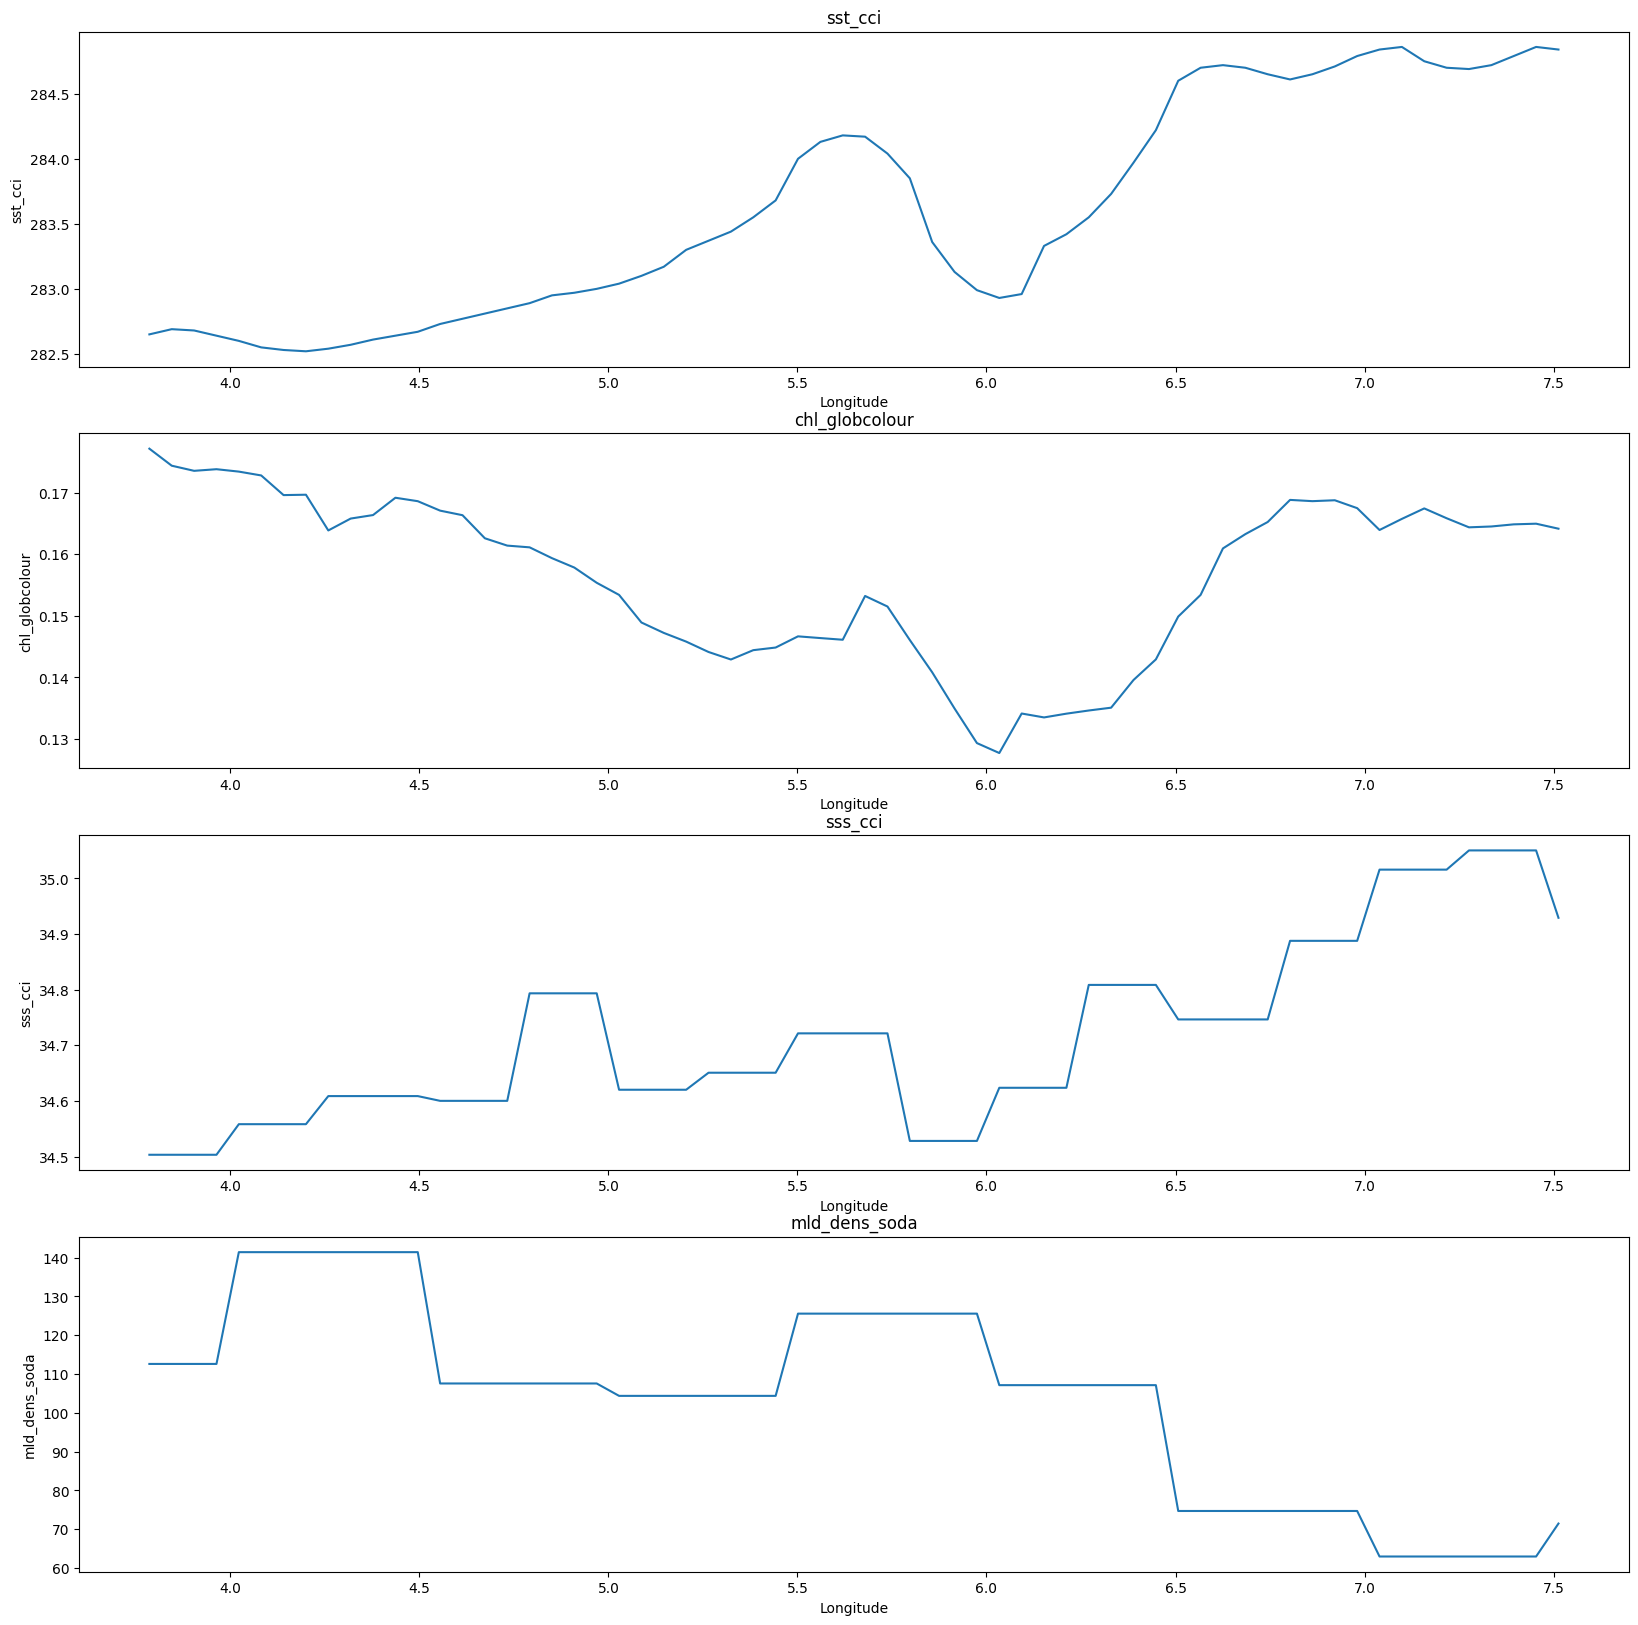

In [30]:
cols = ['sst_cci', 'chl_globcolour', 'sss_cci', 'mld_dens_soda']
# plot each variable in a separate plot
import matplotlib.pyplot as plt


fig, axs = plt.subplots(len(cols), 1, figsize=(20, 20))
for i, col in enumerate(cols):
    axs[i].plot(df_block['lon'], df_block[col])
    axs[i].set_title(col)
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel(col)

In [31]:
df_preds = df_block[cols]
# how many nan values are in the data
df_preds.isna().sum()


sst_cci           0
chl_globcolour    0
sss_cci           0
mld_dens_soda     0
dtype: int64